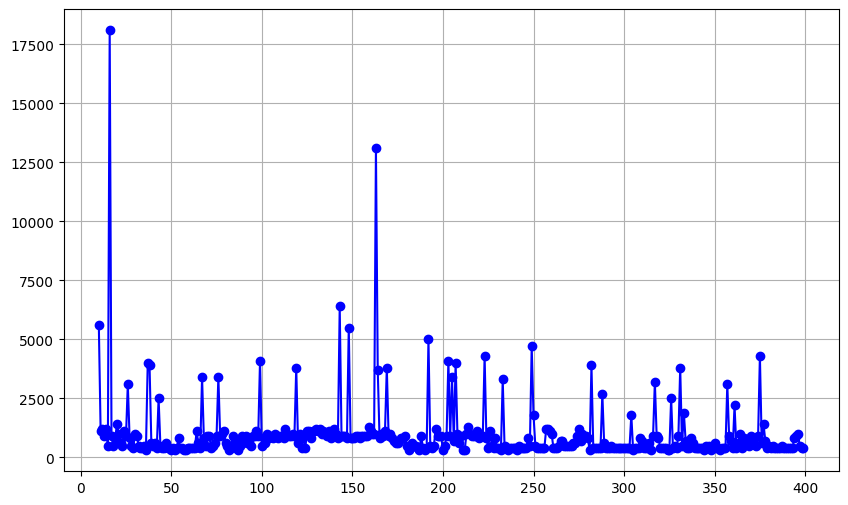

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла без заголовков
data = pd.read_csv('A:\leti-projects\kaggle-leti\gr\data.csv', delimiter=';', header=None, names=['x', 'y'])

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y'], marker='o', linestyle='-', color='b')
# data = pd.read_csv('A:/leti-projects/os-leti-4s/lab4\lab4-1/wlog/wlog_1700.csv', delimiter=';', header=None, names=['x', 'y'])
# plt.plot(data['x'], data['y'], marker='o', linestyle='-', color='r')
# Добавление заголовков и подписей осей


# Показать сетку
plt.grid(True)

# Отображение графика
plt.show()


In [3]:
data

,x,y
0,10,5600
1,11,1100
2,12,1200
3,13,900
4,14,1200
...,...,...
385,395,900
386,396,1000
387,397,500
388,398,400


In [12]:
data_filtered = data[data['y'] <= 1750]        

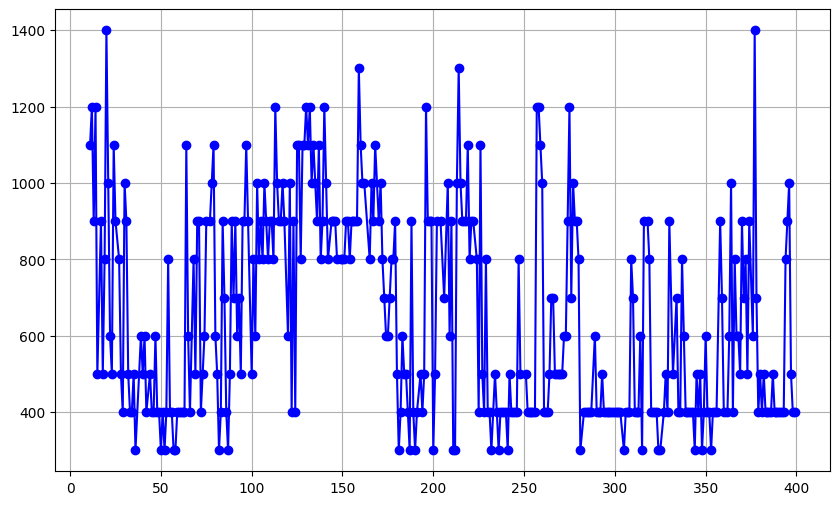

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data_filtered['x'], data_filtered['y'], marker='o', linestyle='-', color='b')
plt.grid(True)
plt.show()

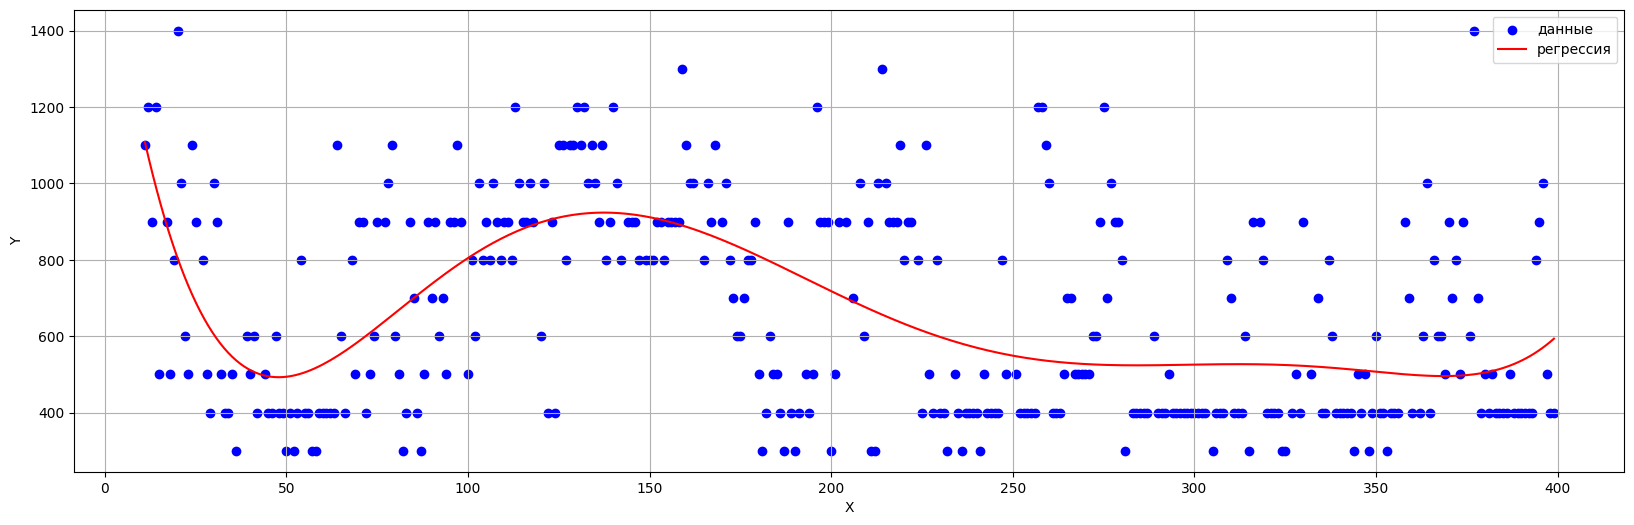

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = data_filtered['x'].values.reshape(-1, 1)
y = data_filtered['y'].values

degree = 6
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

x_new = np.linspace(min(x), max(x), 357).reshape(-1, 1)
x_new_poly = poly_features.transform(x_new)
y_new = model.predict(x_new_poly)
plt.figure(figsize=(20, 6))
plt.scatter(x, y, color='blue', label='данные')
plt.plot(x_new, y_new, color='red', label='регрессия')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
print(model.coef_)

[ 0.00000000e+00 -6.51392542e+01  1.22530101e+00 -9.71963171e-03
  3.74279436e-05 -6.97426891e-08  5.05337994e-11]


In [24]:
# -65.14+1.23*x-0.0097*x^2+0...

In [28]:
residuals = y - y_new
sse = np.sum(residuals**2)
n = len(y)
mse = sse / n
rmse = np.sqrt(mse)
rmse

226.8508320755188

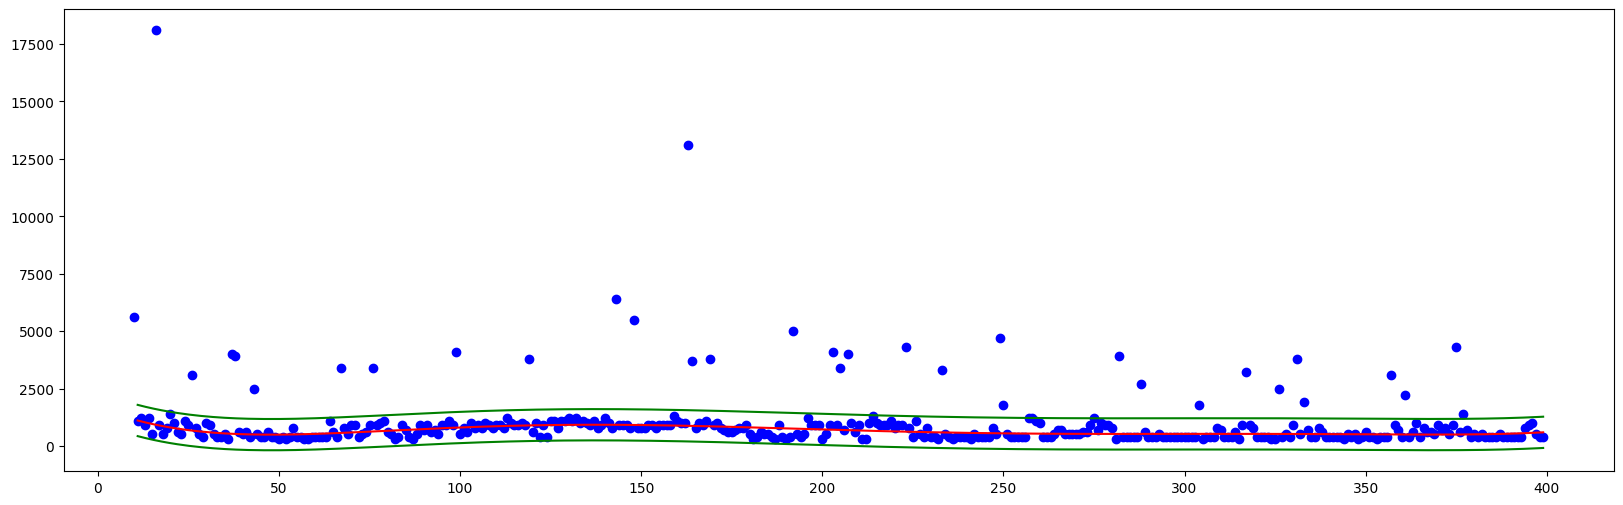

In [30]:
plt.figure(figsize=(20, 6))
x = data['x'].values.reshape(-1, 1)
y = data['y'].values
plt.scatter(x, y, color='blue', label='данные')
plt.plot(x_new, y_new, color='red')
plt.plot(x_new, y_new+rmse*3, color='green')
plt.plot(x_new, y_new-rmse*3, color='green')